In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/rl-master/day1/tabular_mdp
!ls

/content/drive/MyDrive/Colab Notebooks/rl-master/day1/tabular_mdp
gridworld.png  gym_test.py  __pycache__  tabular.ipynb
gridworld.py   pendulum.py  solvers.py	 utils.py


In [ ]:
import numpy as np
from utils import *

# 0. Warming up!

## 0.0. Toy Example

In [ ]:
R = np.array([[-2.0, -0.5],
              [-1.0, -3.0]])

P = np.array([[0.75, 0.25],
              [0.75, 0.25],
              [0.25, 0.75],
              [0.25, 0.75]])

gamma = 0.9

## 0.1. Define Q-function and Greedy policy
What we need to compute: $Q(s, a) = r(s, a) + \gamma \sum_{s^\prime} p(s^\prime \mid s, a) v(s^\prime)$, and $\pi_{\text{greedy}}(s) = \arg\max_a Q(s, a)$.

In [ ]:
def q_ftn(P, R, gamma, v):
    """
    given v, get corresponding q
    hint : v's shape = (|S|, 1)
           P's shape = (|S| * |A|, |S|)
           R's shape = (|S|, |A|)
           [Fill here]'s shape = (|S| * |A|, 1)
           numpy.matmul(A, x) returns a matrix multiplication result A * x.
    """
    # TODO : Complete the following line.
    # return R + gamma * np.reshape([Fill here], newshape=R.shape, order='F')


def bellman_update(P, R, gamma, v):
    # TODO : complete the function
    q = q_ftn(P, R, gamma, v)
    # v_next = np.max(q, axis=..., keepdims=True)
    return v_next


def greedy(P, R, gamma, v):
    """
    construct greedy policy by pi(s) = argmax_a q(s, a)
    """
    q = q_ftn(P, R, gamma, v)
    pi = np.argmax(q, axis=1)

    return pi


# 1. Value Iteration

In [ ]:
EPS = 1e-6
nS, nA = R.shape
# initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

count = 0
while True:
    v_next = bellman_update(P, R, gamma, v)
    if np.linalg.norm(v_next - v, ord=np.inf) < EPS:
        break
    v = v_next
    count += 1
print('Iteration terminated in {} steps.'.format(count))

pi = greedy(P, R, gamma, v)
print_result(v, pi)

Iteration terminated in 129 steps.
+========== Result ==========+
optimal value function : 
v(s1) = -7.327576823826019
v(s2) = -7.672404410032915
optimal policy : 
pi(s1) = a2
pi(s2) = a1


# 2. Policy Iteration

## 2.0. Bellman Equation for Policy Iteration

Policy Iteration iterates between these 2 steps


*   Policy Evaluation : calculate policy value function $v^\pi$
*   Policy Update : from calculated $v^\pi$, update $\pi$


Today, we will focus on *Policy Evaluation*!


\begin{equation*}
v^\pi = (I - \gamma P^\pi)^{-1} R^{\pi}
\end{equation*}


To solve the above equation, you may use <font color='red'>numpy.linalg.solve(A, b)</font>.
This returns a solution of the linear equations $A x = b$, i.e., $x = A^{-1}b$.

### Practice to help understanding!

Suppose 2 states, 2 actions, and $\pi = [a_1, a_0]$

We should select row vector of $P$
\begin{equation*}
p(\cdot|s_0,a_0)\\
p(\cdot|s_1,a_0) \rightarrow p(\cdot|s_1,\pi(s_1))\\
p(\cdot|s_0,a_1) \rightarrow p(\cdot|s_0,\pi(s_0))\\
p(\cdot|s_1,a_1)\\
\end{equation*}

$P^{\pi} = P\;[\;[2,1], \; : \;]$

$2 = 0(s_0) + 2 \cdot 1(\pi(s_0))$

$1 = 1(s_1) + 2 \cdot 0(\pi(s_1))$

In [ ]:
def induced_dynamic(nS, P, R, pi):
    """
    given policy pi, compute induced dynamic P^pi & R^pi
    """
    S = range(nS)
    # TODO : complete the below line
    # rows = ...
    P_pi = P[rows]
    R_pi = np.array([[R[s, pi[s]]] for s in range(nS)])

    return P_pi, R_pi


def eval_policy(nS, P, R, gamma, pi):
    """
    policy evaluation
    """
    P_pi, R_pi = induced_dynamic(nS, P, R, pi)

    Id = np.identity(nS)
    # discounted reward problem
    # TODO : Complete the below lines. (Hint. numpy.linalg.solve(A, b) returns a solution of A * x = b., i.e. A^{-1}b)
    # A = ...
    # b = ...
    
    v_pi = np.linalg.solve(A, b)
    return v_pi

In [ ]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

count = 0
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    pi_next = greedy(P, R, gamma, v)
    if (pi_next == pi).all():
        break
    pi = pi_next
    count += 1
print('Iteration terminated in {} steps.'.format(count))

print_result(v, pi)

Iteration terminated in 1 steps.
+========== Result ==========+
optimal value function : 
v(s1) = -7.327586206896552
v(s2) = -7.6724137931034475
optimal policy : 
pi(s1) = a2
pi(s2) = a1


# 3. Example : GridWorld

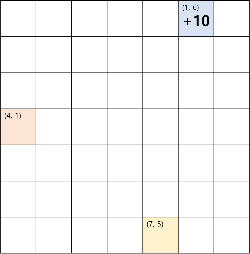

explanation

## 3.0. Load Model

In [ ]:
from gridworld import GridWorld, plot_heatmap

P = GridWorld.P
R = GridWorld.R

gamma = 0.9

## 3.1. Value Iteration

In [ ]:
from utils import *
import time

In [ ]:
EPS = 1e-6
nS, nA = R.shape
# initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

begin = time.time()
count = 0
while True:
    v_next = bellman_update(P, R, gamma, v)
    if np.linalg.norm(v_next - v, ord=np.inf) < EPS:
        break
    v = v_next
    count += 1
pi = greedy(P, R, gamma, v)
v_vi = v
print('Value iteration terminated in {} steps.'.format(count))
print('Elapsed time = ', time.time() - begin, 'sec')

Value iteration terminated in 153 steps.
Elapsed time =  0.017963647842407227 sec


## 3.2. Policy Iteration

In [ ]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

begin = time.time()
count = 0
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    pi_next = greedy(P, R, gamma, v)
    if (pi_next == pi).all():
        break
    pi = pi_next
    count += 1
print('Policy iteration terminated in {} steps.'.format(count))
v_pi = v
print('Elapsed time = ', time.time() - begin, 'sec')

Policy iteration terminated in 7 steps.
Elapsed time =  0.005548715591430664 sec


## 3.3. Visualization!

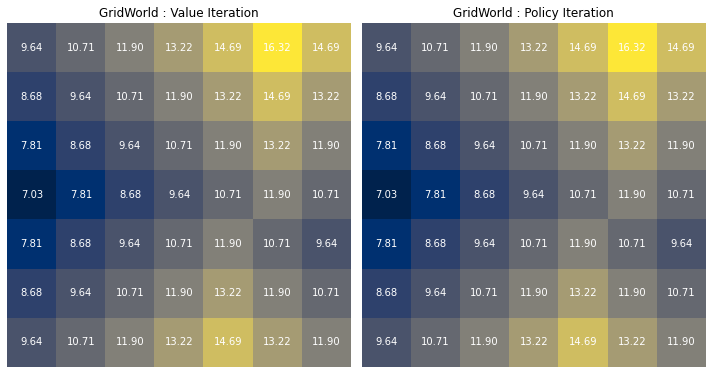

In [ ]:
plot_heatmap(v_vi, v_pi)